In [1]:
import pandas as pd
import numpy as np

In [2]:
import src

In [3]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks'

In [4]:
def load_pickle_preprocessed_data(path):
    """
    Load pickled data for modelling.
    
    Input
    =====
    path, str, to fodler where data is located.
    
    Output
    ======
    X_train,dataframe, 
    X_test,dataframe, 
    y_train,dataframe, 
    y_test, dataframe, 
    
    """
    #### load each data file
    X_train = pd.read_pickle(path + 'X_train.pkl')
    X_test = pd.read_pickle(path + 'X_test.pkl')
    y_train = pd.read_pickle(path + 'y_train.pkl')
    y_test = pd.read_pickle(path + 'y_test.pkl')
    
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = load_pickle_preprocessed_data('../data/processed/v1/')

In [5]:
X_train.shape

(1654, 52)

In [6]:
X_train.head(1)

,EDoccMAX_prevday,callender_DAY(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),EDmorn_STD(EDatt.flag_specreq),EDmorn_STD(EDatt.age),...,callender_MONTH(first_EDatt_time)_4,callender_MONTH(first_EDatt_time)_5,callender_MONTH(first_EDatt_time)_6,callender_MONTH(first_EDatt_time)_7,callender_MONTH(first_EDatt_time)_8,callender_MONTH(first_EDatt_time)_9,callender_MONTH(first_EDatt_time)_10,callender_MONTH(first_EDatt_time)_11,callender_MONTH(first_EDatt_time)_12,callender_WEEKEND(first_EDatt_time)
0,-0.452744,-1.552923,-1.520733,-2.575791,0.77684,0.788307,-1.017596,-1.371472,-0.44764,0.724071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Instantiate model

# Run CV gridsearch

In [7]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [8]:
import xgboost as xgb

In [16]:
from scipy.stats import uniform, randint

In [15]:
uniform(0,0.5)

In [ ]:
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)

In [21]:
xgb_clf = xgb.XGBClassifier()

# grid = {
#     "colsample_bytree": uniform(0.07, 0.7),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(100, 150), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

grid = {
    "gamma": np.arange(0,10),
    "max_depth": np.arange(1,6),
    "n_estimators": [50,100,150],
}

grid_search = find_best_model(xgb_clf,grid,X_train,y_train,'CV set')
svm_clf = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'gamma': 0, 'max_depth': 4, 'n_estimators': 150}
    mean_test_score  mean_train_score
11         0.450341               1.0


In [24]:
pd.DataFrame(grid_search.cv_results_).query('mean_test_score > 0.42')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.227591,0.105819,0.003790,0.001163,0,2,150,"{'gamma': 0, 'max_depth': 2, 'n_estimators': 150}",0.368421,0.371429,...,0.423161,0.073145,11,1.000000,0.920000,0.848214,0.785965,0.741176,0.859071,0.092666
7,0.196084,0.075580,0.003790,0.000975,0,3,100,"{'gamma': 0, 'max_depth': 3, 'n_estimators': 100}",0.338028,0.432432,...,0.421582,0.057089,12,1.000000,0.993711,0.932773,0.851351,0.846797,0.924926,0.066252
8,0.326525,0.160145,0.004580,0.001187,0,3,150,"{'gamma': 0, 'max_depth': 3, 'n_estimators': 150}",0.314286,0.453333,...,0.434856,0.073661,4,1.000000,1.000000,0.988048,0.929936,0.927083,0.969013,0.033370
10,0.277268,0.096431,0.004189,0.000976,0,4,100,"{'gamma': 0, 'max_depth': 4, 'n_estimators': 100}",0.382353,0.469136,...,0.428409,0.080078,8,1.000000,1.000000,1.000000,0.981818,0.972569,0.990877,0.011549
11,0.473152,0.189001,0.004389,0.001017,0,4,150,"{'gamma': 0, 'max_depth': 4, 'n_estimators': 150}",0.400000,0.475000,...,0.450341,0.073571,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
20,0.172774,0.062987,0.002983,0.000617,1,2,150,"{'gamma': 1, 'max_depth': 2, 'n_estimators': 150}",0.347826,0.400000,...,0.423762,0.068692,10,0.988506,0.913907,0.834081,0.787456,0.729412,0.850672,0.091621
22,0.162562,0.060095,0.003182,0.000380,1,3,100,"{'gamma': 1, 'max_depth': 3, 'n_estimators': 100}",0.382353,0.426667,...,0.434820,0.054423,5,0.988506,0.987342,0.923729,0.847458,0.837079,0.916823,0.065314
24,0.114511,0.042238,0.002584,0.000782,1,4,50,"{'gamma': 1, 'max_depth': 4, 'n_estimators': 50}",0.382353,0.426667,...,0.426361,0.051304,9,0.988506,0.967742,0.914530,0.865772,0.833803,0.914070,0.058647
25,0.217844,0.089106,0.003193,0.000397,1,4,100,"{'gamma': 1, 'max_depth': 4, 'n_estimators': 100}",0.358209,0.405405,...,0.421035,0.047520,13,0.988506,0.993711,0.996047,0.978723,0.962217,0.983841,0.012345
28,0.282063,0.106784,0.003401,0.000815,1,5,100,"{'gamma': 1, 'max_depth': 5, 'n_estimators': 100}",0.388060,0.410256,...,0.440285,0.040855,2,0.988506,0.993711,1.000000,0.990991,0.990196,0.992681,0.004027


In [26]:
xgb_clf = xgb.XGBClassifier()

# grid = {
#     "colsample_bytree": uniform(0.07, 0.7),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(100, 150), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

grid = {
    "gamma": [0],
    "max_depth": [2],
    "n_estimators": [150],
}

grid_search = find_best_model(xgb_clf,grid,X_train,y_train,'CV set')
xgb_clf = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'gamma': 0, 'max_depth': 2, 'n_estimators': 150}
   mean_test_score  mean_train_score
0         0.423161          0.859071


In [27]:
from src.eval.eval_utils import BinClassEval

# Warning not sure hsould be evaluating like this! should be using cv_prediction!

No handles with labels found to put in legend.


Model has predict_proba.
AUC:  0.968
F1 score:  0.712
accuracy:  0.929


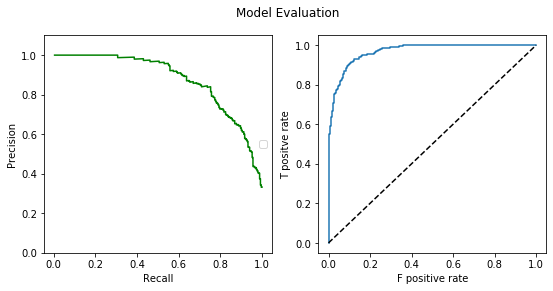

In [28]:
BinClassEval(xgb_clf, X_train, y_train, plot=True)

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
X = SelectKBest(k=30).fit_transform(X_train, y_train)

In [31]:
grid_search = find_best_model(xgb_clf,grid,X,y_train,'CV set')
xgb_kbest = grid_search.best_estimator_

CV MODEL RESULTS
{'gamma': 0, 'max_depth': 2, 'n_estimators': 150}
   mean_test_score  mean_train_score
0         0.438919          0.829361


No handles with labels found to put in legend.


Model has predict_proba.
AUC:  0.957
F1 score:  0.683
accuracy:  0.921


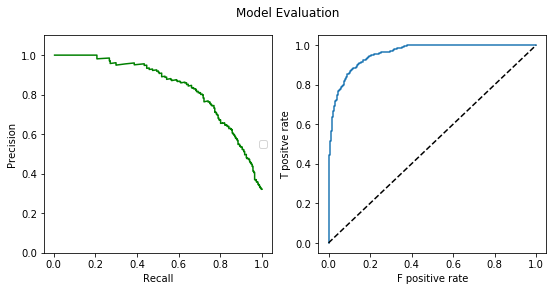

In [32]:
BinClassEval(xgb_kbest, X, y_train, plot=True)

Reducing number of features help the SVM. I guess this is regularising it.

# Logging model and trianing results

Create first log df

model_log = pd.DataFrame(columns=['dataV','model','gridsearch','mean_train','mean_valid','notes'])

model_log

model_log.to_pickle('./../data/output/model_log.pkl')

In [33]:
from src.eval.eval_utils import save_model_to_log

In [34]:
save_model_to_log('./../data/output/model_log.pkl', 'v1', xgb_kbest, grid_search, 'V1 attempt with XGBOOST. KFOLD selection of features helped regularise.')

Model logged.


In [35]:
pd.read_pickle('./../data/output/model_log.pkl')

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
2,v1,"XGBClassifier(base_score=0.5, booster='gbtree'...",mean_fit_time std_fit_time mean_score_tim...,[0.829],[0.439],V1 attempt with XGBOOST. KFOLD selection of fe...
